# Part 2 What do republican and democratic members tweet about?

In [156]:
# empties the files if the already exist and creates them if they dont.
file = io.open("Republican.txt", mode="w", encoding="utf-8")
file.write(u"")
file.close()
file = io.open("Democratic.txt", mode="w", encoding="utf-8")
file.write(u"")
file.close()

In [157]:
#make a list of all the politicians based on the "h115_tw.csv" file
df = pd.read_csv('H115_tw.csv')
handles = df['tw_name'].unique()


#overall this code opens the different files containing twitter data, removes handles and websites and then saves them to 
#either the republican or democratic file, depending on which party the given member is in.
for names in handles:
    file = io.open("tweets/" + names, mode="r", encoding="utf-8")
    text = file.read()
    
    #this is the part removing handles and websites.
    w = re.findall(r'@\w*', text)
    for i in range(0, len(w)):
        text = text.replace(w[i], "")
    w = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+[\/\w+]*', text)
    for i in range(0, len(w)):
        text = text.replace(w[i], "")
        
    #this part checks if the member is a republican or not, and appends the members file data to the correct text document.    
    Temp = df.loc[df['tw_name'] == names] 
    counter = Temp['Party'].str.contains('Republican').sum()
    if counter > 0:
        file = io.open("Republican.txt", mode="a+", encoding="utf-8")
        file.write(text)
        file.close()
    else:
        file = io.open("Democratic.txt", mode="a+", encoding="utf-8")
        file.write(text)
        file.close()

In [194]:


#a tokenizer is created which removes punctuations.
tokenizer = RegexpTokenizer(r'\w+')

#this list is a list of stopwords
stopwordslist = set(stopwords.words('english'))

#some twitter tags, for example rt = retweet.
twitterTags = ['rm', 'rt']

#reads all data from the republican file, removes numbers and makes everything lower case..
file = open("Republican.txt", mode="r")
text = file.read()
text = re.sub(r'\d+', '', text)
text = text.lower()

#tokenizes the data with the tokenizer which also removes punctuation.
filtered_Republican = tokenizer.tokenize(text)

#removes stopwords, twitterTags and some other entries from the tokenized list.
filtered_Republican = [w for w in filtered_Republican if w not in stopwordslist and w not in twitterTags and '\xe2' not in w and '\xcc' not in w and '\xe3' not in w]

#displays the tokenized list for the republicans.
filtered_Republican

['great',
 'flight',
 'nome',
 'today',
 'kotzebue',
 'met',
 'otz',
 'telephone',
 'kotzebue',
 'electric',
 'association',
 'visited',
 'maniilaq',
 'health',
 'big',
 'thank',
 'th',
 'state',
 'public',
 'service',
 'award',
 'honor',
 'represent',
 'alaska',
 'long',
 'supported',
 'literacy',
 'council',
 'mission',
 'change',
 'lives',
 'education',
 'road',
 'trip',
 'fairbanks',
 'continues',
 'great',
 'stop',
 'beat',
 'clear',
 'day',
 'view',
 'denali',
 'best',
 'kind',
 'pit',
 'stop',
 'hardware',
 'store',
 'nice',
 'stop',
 'willow',
 'great',
 'stop',
 'willow',
 'hardware',
 'shop',
 'first',
 'stop',
 'road',
 'trip',
 'houston',
 'chamber',
 'commerce',
 'meeting',
 'great',
 'catch',
 'local',
 'issues',
 'road',
 'trip',
 'fairbanks',
 'good',
 'start',
 'afn',
 'annual',
 'convention',
 'opportunity',
 'come',
 'together',
 'discuss',
 'history',
 'traditions',
 'also',
 'looking',
 'morning',
 'joined',
 'filipino',
 'american',
 'society',
 'fairbanks',
 'hea

In [195]:
#opens the democratic file, removes numbers and sets everything to lower case.
file = open("Democratic.txt", mode="r")
text = file.read()
text = re.sub(r'\d+', '', text)
text = text.lower()

#tokenizes the text, removing punctuation.
filtered_Democratic = tokenizer.tokenize(text)

#removes stopwords, twitterTags and some other entries from the tokenized list.
filtered_Democratic = [w for w in filtered_Democratic if w not in stopwordslist and w not in twitterTags and '\xe2' not in w and '\xcc' not in w and '\xe3' not in w]

#displays the tokenized democratic list.
filtered_Democratic

['grateful',
 'lisa',
 'martin',
 'gina',
 'steward',
 'western',
 'wayne',
 'chapter',
 'presenting',
 'onepride',
 'retired',
 'justice',
 'john',
 'paul',
 'stevens',
 'ford',
 'nominee',
 'unanimously',
 'confirmed',
 'says',
 'kavanaugh',
 'belong',
 'supreme',
 'sure',
 'understand',
 'destroyed',
 'bill',
 'hr',
 'civil',
 'rights',
 'icon',
 'miss',
 'aretha',
 'grateful',
 'colleagues',
 'called',
 'due',
 'process',
 'weighing',
 'judgment',
 'would',
 'urge',
 'never',
 'allow',
 'legacy',
 'legacy',
 'owe',
 'father',
 'john',
 'conyers',
 'sr',
 'integrated',
 'labor',
 'unions',
 'proud',
 'fortunate',
 'part',
 'legacy',
 'years',
 'fighting',
 'civil',
 'rights',
 'making',
 'cannot',
 'good',
 'conscience',
 'allow',
 'charges',
 'undermine',
 'colleagues',
 'democratic',
 'caucus',
 'come',
 'believe',
 'presence',
 'ranking',
 'member',
 'committee',
 'would',
 'serve',
 'efforts',
 'challenges',
 'could',
 'pressing',
 'face',
 'administration',
 'cares',
 'little',

In [196]:

count = Counter(filtered_Republican)
count2 = Counter(filtered_Democratic)

#This code calculates this TF for each party by dividing each counter by the total amount of items in the lists.
republicanTF =  Counter({k:float(v)/float(len(filtered_Republican)) for k,v in count.items()})
democraticTF =  Counter({k:float(v)/float(len(filtered_Democratic)) for k,v in count2.items()})   

After the two different documents has been tokenized and TF has been calculated, the results from this can be displayed.
TF calculates the percentage that the different word fill in the tokenized list. It does this by counting how many times the different values occure and then dividing this by the total amount of entries in the list.

In [197]:
republicanTF.most_common(5)

[('co', 0.013519145841831759),
 ('today', 0.010685845024209426),
 ('amp', 0.009224855009488676),
 ('great', 0.007650798999698491),
 ('house', 0.0053007998864906085)]

In [198]:
democraticTF.most_common(5)

[('amp', 0.01171003870429752),
 ('today', 0.008802416069826832),
 ('trump', 0.006426943238268703),
 ('co', 0.005916737757125733),
 ('thank', 0.004136504653567736)]

Based on this it can be seen that the two lists are pretty similar, when only TF has been calculated and also that the most common words doesn't really say too much about the parties, maybe with the exception of "trump".
Therefore the IDF and TF-IDF has to be calculated in order to make words which occure in both list, less important and focus on the words which are "unique" for each party.

In [199]:
republicanIDF = Counter()
democraticIDF = Counter()
republicanTFIDF = Counter()
democraticTFIDF = Counter()

# This code checks if the word is in 1 document or both of them and the calculate the according IDF. the IDF and TF is then 
# used in order to calculate the TF-IDF for each party.
for keys in count:
    c = 1
    if keys in count2.keys():
        c = 2        
    republicanIDF[keys] = (math.log(float(2)/float(c)))
    republicanTFIDF[keys] = republicanTF[keys]*republicanIDF[keys]

for keys in count2:
    c = 1
    if keys in count.keys():
        c = 2        
    democraticIDF[keys] = (math.log(float(2)/float(c)))
    democraticTFIDF[keys] = democraticTF[keys]*democraticIDF[keys]

The top 10 most common elements in each of the parties TF-IDF is displayed:

In [200]:
democraticTFIDF.most_common(10)

[('goptaxscam', 0.0006445510718699071),
 ('latinos', 0.00010457318275175484),
 ('taxscam', 9.886919096529549e-05),
 ('gopfarmbill', 8.936253798786322e-05),
 ('believesurvivors', 8.746120739237677e-05),
 ('getcovered', 8.365854620140387e-05),
 ('reproductive', 7.415189322397161e-05),
 ('metoo', 7.225056262848516e-05),
 ('cbc', 7.225056262848516e-05),
 ('defendourfuture', 7.225056262848516e-05)]

In [201]:
republicanTFIDF.most_common(10)

[('taxcutsandjobsact', 0.0005147923697913858),
 ('rohrabacher', 0.0001552060577579999),
 ('idaho', 0.00012754557221697022),
 ('griffith', 9.988508667594054e-05),
 ('tcot', 9.988508667594054e-05),
 ('posey', 7.376129477607917e-05),
 ('lance', 7.222460113491086e-05),
 ('holyfire', 6.607782657023759e-05),
 ('sensenbrenner', 6.300443928790096e-05),
 ('utpol', 6.146774564673264e-05)]

the two lists TF-IDF values are also represented through word clouds:

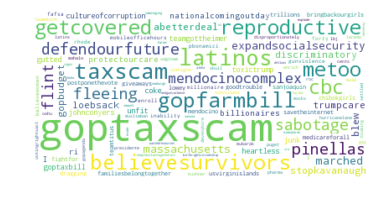

In [202]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=democraticTFIDF)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

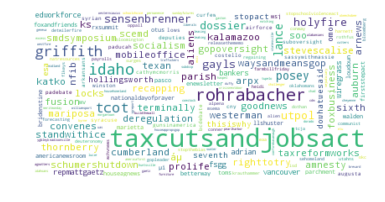

In [203]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=republicanTFIDF)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In order to look at the most common words more clearly, the top 10 most common words for each party is extracted and displayed as a word cloud:

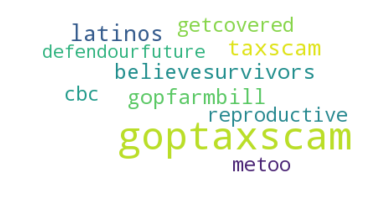

In [204]:
wordcloud = WordCloud(background_color='white')
demoTopTen = dict(democraticTFIDF.most_common(10))
wordcloud.generate_from_frequencies(frequencies=demoTopTen)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

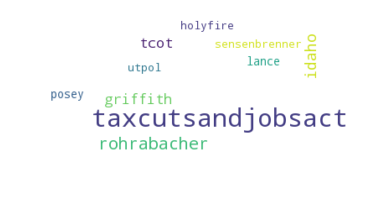

In [205]:
wordcloud = WordCloud(background_color='white')
repTopTen = dict(republicanTFIDF.most_common(10))
wordcloud.generate_from_frequencies(frequencies=repTopTen)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the extractions it can be seen that the democrats talk alot about taxscams, being covered and defending their fututure,
which can also be linked to healthcare and to so on. They also focus on reproduction, farming etc. which fits the party.

The republicans talk about  tax cuts, the top conservatives, the republican politician  "Dana Rohrabacher", one word which is also used alot is "holyfire" which is a trending hashtag for the republicans.

Compared to the data from the wiki pages, the twitter data is much more descriptive when it comes to describing the different parties political opinions. This is because the wiki pages contains descriptions of each members and who they are, whereas twitter is used as a way for politicians to communicate with the voters. The Tweets are therefore mostly political and contains trending hashtags from the parties. These hashtags are commonly used between the members in a party and is therefore likely to occure in a wordcloud such as this.
